# Network Science Analysis of paper “Marvel Universe looks almost like a real social network“

This notebook aims to replicate some of the results presented in the paper ***Marvel Universe looks almost like a real social network***. The paper examines the relationships, influences, and interactions between heroes and comics using network science.

***Authors***:

Manuel Alejandro Aponte Ramirez

Ivan Alejandro Cruz Tole

Martin Eduardo Espitia Nery

In [11]:
import pandas as pd

In [12]:
def network_file_to_df(path:str, col_left:str ,col_right:str, sep=':' ):
    """
    Read data from a network file and return a DataFrame.

    Parameters:
    - path (str): The path to the network file.
    - col_left (str): The name for the column containing the left-side values.
    - col_right (str): The name for the column containing the right-side values.
    - sep (str, optional): The separator used in the network file. Default is ':'.

    Returns:
    - pandas.DataFrame: A DataFrame containing the data read from the network file.
    """
    data = []

    with open(path, 'r', encoding="utf8") as file:
        for line in file:
            try:
                index, item = line.strip().split(sep, maxsplit=1)
                data.append(
                    {col_left:index, col_right:item.strip()}
                    )  
            except:
                print('Error:',line)
    
    return pd.DataFrame(data)

### Read network dataset

Next, three datasets will be loaded. The information for each of these is as follows:


**Characters (Node)**

*vertex*: Vertex identification

*character*: Character's name

**Comics (Node)**

*vertex*: Vertex identification

*character*: Book's name

**Edges (Edge)**

*character*: Character's vertex identification

*comic*: Comics in which the character appears.

In [14]:
characters_df = network_file_to_df('data/characters.txt','vertex','character')
characters_df['index'] = characters_df.vertex.str.extract('(\d+)').astype(int)
characters_df.head()

,vertex,character,index
0,Vertex 1,24-HOUR MAN/EMMANUEL,1
1,Vertex 2,3-D MAN/CHARLES CHANDLER & HAROLD CHANDLER,2
2,Vertex 3,4-D MAN/MERCURIO,3
3,Vertex 4,8-BALL/,4
4,Vertex 5,A,5


In [15]:
len(characters_df)

6486

In [16]:
comic_df = network_file_to_df('data/comics.txt','vertex','comic')
comic_df['index'] = comic_df.vertex.str.extract('(\d+)').astype(int)
comic_df.head()

,vertex,comic,index
0,Vertex 6487,AA2 35,6487
1,Vertex 6488,M/PRM 35,6488
2,Vertex 6489,M/PRM 36,6489
3,Vertex 6490,M/PRM 37,6490
4,Vertex 6491,WI? 9,6491


In [17]:
len(comic_df)

12942

In [18]:
edges_raw_df = network_file_to_df('data/edges.txt','character','comic', sep=" ")
edges_raw_df.head()

,character,comic
0,1,6487
1,2,6488 6489 6490 6491 6492 6493 6494 6495 6496
2,3,6497 6498 6499 6500 6501 6502 6503 6504 6505
3,4,6506 6507 6508
4,5,6509 6510 6511


In [19]:
len(edges_raw_df)

11090

### Data wrangling

* Normalize relationships between characters and comics

In [20]:
edges_raw_df['comic'] = edges_raw_df['comic'].apply(lambda x: x.split())
edges_df = edges_raw_df.explode('comic')
edges_df.reset_index(drop=True, inplace=True)

In [21]:
edges_df.head()

,character,comic
0,1,6487
1,2,6488
2,2,6489
3,2,6490
4,2,6491


In [22]:
len(edges_df)

96662

The previous findings confirm the following original paper results:

*"this database collects over 96 000 appearances by more than 6 500 characters in
about 13 000 comic books"*

In [23]:
table_1_df = pd.DataFrame(
    [{"title": 'Number of characters', 'result': len(characters_df)},
    {"title": 'Number of books', 'result': len(comic_df)},
    {"title": 'Mean books per character', 'result': f"{edges_df.groupby('character').count().mean().values[0]:.2f}"},
    {"title": 'Mean characters per book:', 'result': f"{edges_df.groupby('comic').count().mean().values[0]:.2f}"}
    ]
)
table_1_df

,title,result
0,Number of characters,6486
1,Number of books,12942
2,Mean books per character,14.90
3,Mean characters per book:,7.47


The previous table replicates the original paper table; *Table 1: Basic data on appearances of characters in comic books.*

### Replicating section 3.1 The bipartite graph

* Looking for the most popular character

In [49]:
most_popular_character = edges_df.groupby('character').count().reset_index().sort_values('comic', ascending=False).head(1)
most_popular_character

,character,comic
4786,5306,1625


In [50]:
characters_df[characters_df["index"] == int(most_popular_character['character'].values[0])]

,vertex,character,index
5305,Vertex 5306,SPIDER-MAN/PETER PARKER,5306


The previous results confirm the result:
*The number of appearances spans from 1 to 1 625: this greatest value corresponds to Spider-Man*

* Creating distribution plots in the bipartite graph

In [51]:
freq_characters_by_book = edges_df.groupby('comic').count().value_counts(normalize = True).reset_index()
freq_characters_by_book.columns = ['number_characters_per_book','frequency_of_books']
freq_characters_by_book.head()

,number_characters_per_book,frequency_of_books
0,1,0.119688
1,3,0.084917
2,5,0.084454
3,4,0.084299
4,2,0.081286


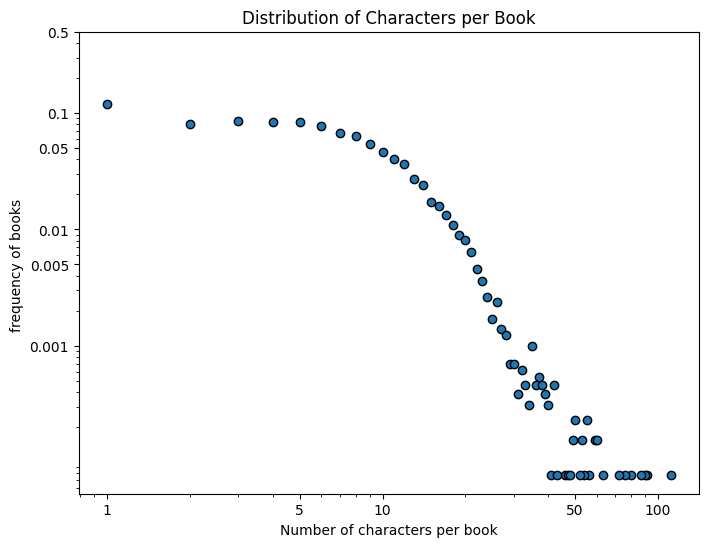

In [52]:
import matplotlib.pyplot as plt


# Create the scatter plot
plt.figure(figsize=[8, 6])
plt.scatter(freq_characters_by_book['number_characters_per_book'], freq_characters_by_book['frequency_of_books'], edgecolor='black')
plt.xlabel('Number of characters per book')
plt.ylabel('frequency of books ')
# Applying log scale
plt.xscale('log')
plt.yscale('log')

# Set specific tick marks
x_ticks = [1, 5, 10, 50, 100]
y_ticks = [0.001, 0.005, 0.01, 0.05, 0.1,0.5]
plt.xticks(x_ticks, labels=x_ticks)
plt.yticks(y_ticks, labels=y_ticks)

plt.title('Distribution of Characters per Book')
#plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [53]:
freq_characters_by_character = edges_df.groupby('character').count().value_counts(normalize = True).reset_index()
freq_characters_by_character.columns = ['number_books_per_character','frequency_of_characters']
freq_characters_by_character.head()

,number_books_per_character,frequency_of_characters
0,1,0.284150
1,2,0.159420
2,3,0.100678
3,4,0.061980
4,5,0.053808


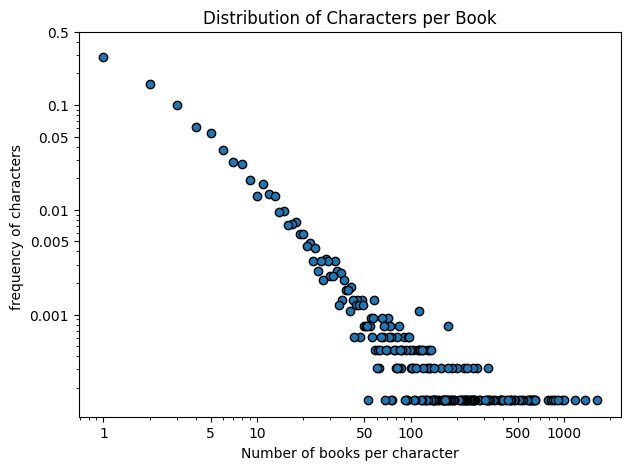

In [54]:
import matplotlib.pyplot as plt


# Create the scatter plot
plt.figure(figsize=[7, 5])
plt.scatter(freq_characters_by_character['number_books_per_character'], freq_characters_by_character['frequency_of_characters'], edgecolor='black')
plt.xlabel('Number of books per character')
plt.ylabel('frequency of characters ')
# Applying log scale
plt.xscale('log')
plt.yscale('log')

# Set specific tick marks
x_ticks = [1, 5, 10, 50, 100,500,1000]
y_ticks = [0.001, 0.005, 0.01, 0.05, 0.1,0.5]
plt.xticks(x_ticks, labels=x_ticks)
plt.yticks(y_ticks, labels=y_ticks)

plt.title('Distribution of Characters per Book')
#plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


The previous plots show a high similarity between the figures 1 and 2 of the paper.

### Creating the collaboration network 


In [56]:
# all collaborations in the Marvel Universe history,
merged_df = pd.merge(edges_df, edges_df, on='comic')
merged_df['relation_key'] = merged_df.apply(lambda row: str(sorted((row['character_x'], row['character_y']))), axis=1)
merged_df['relation_key'] = merged_df.apply(lambda row: str(sorted((row['character_x'], row['character_y']))), axis=1)
filtered_df = merged_df[merged_df['character_x'] != merged_df['character_y']]
unique_df = filtered_df.drop_duplicates(subset=['relation_key', 'comic'])
unique_df

,character_x,comic,character_y,relation_key
1,1,6487,1999,"['1', '1999']"
2,1,6487,6459,"['1', '6459']"
3,1,6487,6463,"['1', '6463']"
4,1,6487,6464,"['1', '6464']"
5,1,6487,6471,"['1', '6471']"
...,...,...,...,...
1236181,6481,18709,6484,"['6481', '6484']"
1236184,6482,15336,6485,"['6482', '6485']"
1236185,6482,15336,6486,"['6482', '6486']"
1236189,6483,18709,6484,"['6483', '6484']"


In [58]:
# Number of link
network_collaboration = unique_df.groupby('relation_key').first().reset_index()
network_collaboration

,relation_key,character_x,comic,character_y
0,"['1', '1999']",1,6487,1999
1,"['1', '6459']",1,6487,6459
2,"['1', '6463']",1,6487,6463
3,"['1', '6464']",1,6487,6464
4,"['1', '6471']",1,6487,6471
...,...,...,...,...
168262,"['983', '984']",983,13798,984
168263,"['983', '985']",983,13798,985
168264,"['984', '985']",984,13798,985
168265,"['988', '989']",988,6545,989


Upon reviewing the datasets "unique_df" and "network_collaboration," it's clear that "unique_df" includes all collaborations in the Marvel Universe history. On the other hand, "network_collaboration" focuses on 168,267 links showing characters who have collaborated in comic books.

In [59]:
import networkx as nx

G = nx.from_pandas_edgelist(network_collaboration, 'character_x', 'character_y')

In [60]:
mean_partners_per_character = sum(dict(G.degree()).values()) / G.number_of_nodes()
mean_partners_per_character

52.03865780114427

In [61]:
giant_component = max(nx.connected_components(G), key=len)
size_of_giant_component = len(giant_component)
size_of_giant_component

6449

In [62]:
giant_subgraph = G.subgraph(giant_component)


In [69]:
import random

node_degrees = {node: degree for node, degree in G.degree()}

# Sort the dictionary by degrees in descending order
sorted_nodes = sorted(node_degrees, key=node_degrees.get, reverse=True)

# Extract the top 3500 nodes based on their degrees
top_nodes = sorted_nodes[:4000]

# Create a subgraph using these nodes
subgraph = G.subgraph(top_nodes)

# Extract the largest connected component from the subgraph
largest_cc = max(nx.connected_components(subgraph), key=len)
connected_subgraph = subgraph.subgraph(largest_cc)


In [70]:

# Calculate the average shortest path length for the largest connected component of the subgraph
avg_shortest_path_length = nx.average_shortest_path_length(connected_subgraph)
print("Average shortest path length in the largest connected component of the subgraph:", avg_shortest_path_length)


Average shortest path length in the largest connected component of the subgraph: 2.3821647911977997


In [77]:
maximum_distance = nx.diameter(connected_subgraph)
maximum_distance

4

In [75]:
clustering_coefficient = nx.average_clustering(G)

In [76]:
clustering_coefficient

0.776106168377454

In [60]:
nx.transitivity(G) 

0.19255491397568864